# Simple spider and fly simulator
I create a simple spider and flies simulator to whatch the interactions between the animals on a closed biological system.

In [11]:
from graphics import *
import random as random
import math
import time
import matplotlib.pyplot as plt

We define the classes for spiders and flie

In [12]:
class fly:
    def __init__(self,posx,posy):
        self.x = posx
        self.y = posy
        self.live = 2
    def putfly(self,window,flypoints):
        c = True
        for i in flypoints:
            xs,ys = map(int,i.split())
            if(xs == -1 and ys == -1):
                c = False
            else:
                pt = Point(self.x+xs,self.y+ys)
                if(c):
                    pt.setOutline('blue')
                else:
                    pt.setOutline("black")
                pt.draw(window)
    def move(self,w,h):
        xp = random.randint(-40,40)
        yp = random.randint(-40,40)
        self.x = (self.x+xp)%w
        self.y = (self.y+yp)%h
        self.live -=1
    def reproduce(self,flies,me):
        if self.live <=0:
            numsons = random.randint(2,10)
            for i in range(numsons):
                sx = self.x + random.randint(5,15)
                sy = self.y + random.randint(5,15)
                temf = fly(sx,sy)
                flies.append(temf)
            flies.remove(me)

In [13]:
class spider:
    def __init__(self,posx,posy):
        self.x = posx
        self.y = posy
        self.belly = 0
        self.live = 2
    def putspider(self,window,spiderspoints):        
        for i in spiderspoints:
            xs,ys = map(int,i.split())
            pt = Point(self.x+xs,self.y+ys)
            pt.setOutline("black")
            pt.draw(window)
        #eyes
        e1 = Point(self.x+7,self.y+8)
        e1.setOutline("yellow")
        e2 = Point(self.x+10,self.y+8)
        e2.setOutline("yellow")
        e1.draw(window)
        e2.draw(window)
    def eat(self,flies):
        a = 2
        for i in flies:
            d = math.sqrt(abs(self.x - i.x )) + math.sqrt(abs(self.y - i.y))
            if a == 0:
                break
            if(d <=20):
                self.x = i.x
                self.y = i.y
                flies.remove(i)
                self.belly+=1
                a-=1
                # break
        if(a == 2):
            self.live -=1
            # print(self.live)
    def reproduce(self,spiders, me):
        if self.live <=0:
            spiders.remove(me)
            # print("quit" + str(len(spiders)))
            return
        if self.belly >=4:
            numsons = random.randint(0,10)
            for i in range(numsons):
                sx = self.x + random.randint(0,20)
                sy = self.y + random.randint(0,20)
                tem = spider(sx,sy)
                spiders.append(tem)
            spiders.remove(me)

Now we define the variables and the main method 

In [14]:
height = 600
wight = 1000
nf =170
ns = 60

In [15]:
def main(ns,nf):
    # setup
    series = list()
    s =0
    spy =list()
    fli = list()
    nspiders = ns
    nflies = nf
    #import the points
    flyform = open("../forms/fly.form",'r')
    flypoints = flyform.readlines()
    spiderform = open("../forms/spider.form","r")
    spiderspoints = spiderform.readlines()
    #define world
    win = GraphWin("Spider and Flyes",wight,height)
    spiders = list()
    flies = list()
    #put init
    for i in range(nspiders):
        spiders.append(spider(random.randint(0,1000),random.randint(0,600)))
    for i in range(nflies):
        flies.append(fly(random.randint(0,1000),random.randint(0,600)))
    while(True):
        series.append(s)
        s+=1
        spy.append(len(spiders))
        fli.append(len(flies))
        clear(win)
        # drawspiders(spiders,win,spiderspoints)    
        # drawflies(flies,win,flypoints)
        moveflies(flies)
        spidereat(spiders,flies)
        reproducespiders(spiders)
        reproduceflies(flies)
        print("Flies population:" + str(len(flies)))
        print("Spiders population: " + str(len(spiders)))
        if(len(flies) ==0 or len(spiders) == 0 or len(flies) >=100000):
            if len(flies) <=0:
                for i in range(nflies):
                        flies.append(fly(random.randint(0,1000),random.randint(0,600)))
            else:
                break   
        # time.sleep(.01)
    series.append(s)
    s+=1
    spy.append(len(spiders))
    fli.append(len(flies))
    print(spy)
    print(fli)
    # plt.subplot(211)
    plt.plot(series,spy,label="Spiders")
    plt.plot(series,fli,label="Flies")
    plt.legend(bbox_to_anchor=(.8,1),loc=2,borderaxespad=0 )
    plt.show()
    # draw final
    clear(win)
    drawspiders(spiders,win,spiderspoints)    
    drawflies(flies,win,flypoints)
    win.getMouse()
    win.close()

more mothods

In [16]:
def clear(window):
    for i in window.items[:]:
        i.undraw()
    window.update()
def drawspiders(elements,window,points):
    for i in elements:
            i.putspider(window,points)
def drawflies(elements,window,points):
    for i in elements:
        i.putfly(window,points)
def moveflies(elements):
    for i in elements:
        i.move(wight,height)
def spidereat(spiders, flies):
    for i in spiders:
        i.eat(flies)
def reproducespiders(spiders):
    for i in spiders:
        i.reproduce(spiders,i)
def reproduceflies(flies):
    for i in flies:
        i.reproduce(flies,i)

and finally run

Flies population:50
Spiders population: 60
Flies population:3
Spiders population: 113
Flies population:0
Spiders population: 113
Flies population:9
Spiders population: 124
Flies population:0
Spiders population: 80
Flies population:28
Spiders population: 56
Flies population:0
Spiders population: 31
Flies population:108
Spiders population: 36
Flies population:163
Spiders population: 52
Flies population:98
Spiders population: 101
Flies population:147
Spiders population: 117
Flies population:102
Spiders population: 139
Flies population:32
Spiders population: 125
Flies population:1
Spiders population: 133
Flies population:0
Spiders population: 90
Flies population:77
Spiders population: 62
Flies population:153
Spiders population: 60
Flies population:112
Spiders population: 52
Flies population:156
Spiders population: 77
Flies population:50
Spiders population: 114
Flies population:23
Spiders population: 141
Flies population:0
Spiders population: 134
Flies population:53
Spiders population: 116


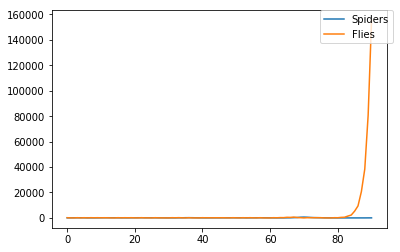

GraphicsError: Can't draw to closed window

In [17]:
main(ns,nf)